In [22]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras 
from keras.models import  Sequential
from keras.layers import Dense
from keras.layers import Embedding
import numpy as np
import plotly.express as px
import os
from sklearn.model_selection import train_test_split

In [23]:
pd.options.plotting.backend = "plotly"

# Load data

In [24]:
df = pd.read_csv('~/Downloads/feeds-13.csv')
df = df.drop(columns=['field8', 'latitude', 'longitude', 'elevation', 'status'])
df = df.rename(columns={"field1":"CO2", "field2":"PM25", "field3":"PM10", "field4":"Temp", "field5":"Humidity", "field6":"Pressure", "field7":"Lux"})

In [25]:
df1 = pd.read_csv('~/Downloads/kerkrade4tillJune1.csv')
df1 = df1.rename(columns={"field1":"CO2", "field2":"PM25", "field3":"PM10", "field4":"Temp", "field5":"Humidity", "field6":"Pressure", "field7":"Lux"})

In [26]:
df.created_at

0         2021-05-15T12:43:28+02:00
1         2021-05-15T12:44:28+02:00
2         2021-05-15T12:45:28+02:00
3         2021-05-15T12:46:28+02:00
4         2021-05-15T12:47:28+02:00
                    ...            
169589    2021-09-24T07:24:35+02:00
169590    2021-09-24T07:25:35+02:00
169591    2021-09-24T07:26:35+02:00
169592    2021-09-24T07:27:35+02:00
169593    2021-09-24T07:28:35+02:00
Name: created_at, Length: 169594, dtype: object

In [27]:
" ".join(df1.created_at.iloc[0].split()[:-1])

'2020-08-24 23:36:49'

# Data Analytics

## Correlation Analysis

In [28]:
import seaborn as sns

<AxesSubplot:>

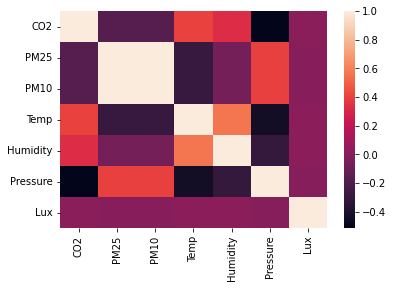

In [29]:
df_corr = df.drop(["created_at", "entry_id"], axis=1)
df_corr = df_corr.corr()
sns.heatmap(df_corr)
## postive red, negative blue, 0 white

In [30]:
df_corr.loc["CO2"]

CO2         1.000000
PM25       -0.174118
PM10       -0.173935
Temp        0.403772
Humidity    0.330445
Pressure   -0.515853
Lux         0.007520
Name: CO2, dtype: float64

## Pre processing

In [31]:
timestart = pd.Timestamp(2021, 6, 1, 0)

timeend = pd.Timestamp(2021, 6, 1, 0)

In [32]:
df.created_at = df.created_at.apply(lambda row:row.split('+')[0])

df.created_at = df.created_at.apply(lambda row:pd.Timestamp(row))

In [33]:
df1.created_at = df1.created_at.apply(lambda row:" ".join(row.split()[:-1]))

df1.created_at = df1.created_at.apply(lambda row:pd.Timestamp(row))

In [34]:
df1.created_at

0        2020-08-24 23:36:49
1        2020-08-24 23:37:49
2        2020-08-24 23:38:48
3        2020-08-24 23:39:49
4        2020-08-24 23:40:49
                 ...        
341931   2021-06-01 10:55:38
341932   2021-06-01 10:56:38
341933   2021-06-01 10:57:38
341934   2021-06-01 10:58:38
341935   2021-06-01 10:59:38
Name: created_at, Length: 341936, dtype: datetime64[ns]

In [35]:
df = df[df.created_at > timestart]
df1 = df1[df1.created_at <= timeend]

### Create sub dataset from df1

In [36]:
dataframes = {}
times = [(pd.Timestamp(2020, 9, 21, 12, 31), pd.Timestamp(2020, 9, 24, 8, 53)),
        (pd.Timestamp(2020, 9, 24, 11, 43), pd.Timestamp(2020, 9, 25, 16, 19)),
        (pd.Timestamp(2020, 9, 30, 12, 30), pd.Timestamp(2020, 10, 1, 17, 42)),
        (pd.Timestamp(2020, 10, 1, 23, 52), pd.Timestamp(2020, 10, 3, 6, 42)), 
        (pd.Timestamp(2020, 10, 3, 18, 52), pd.Timestamp(2020, 10, 4, 6, 44)),
        (pd.Timestamp(2020, 10, 19, 22, 20), pd.Timestamp(2020, 10, 20, 4, 36)),
        (pd.Timestamp(2020, 10, 20, 4, 57), pd.Timestamp(2020, 10, 20, 7, 12)),
        (pd.Timestamp(2020, 10, 20, 21, 34), pd.Timestamp(2020, 10, 21, 15, 15)),
        (pd.Timestamp(2020, 10, 24, 17, 13), pd.Timestamp(2020, 10, 25, 8, 25)),
        (pd.Timestamp(2020, 10, 27, 16, 51), pd.Timestamp(2020, 10, 27, 21, 55)),
        (pd.Timestamp(2020, 11, 14, 22, 45), pd.Timestamp(2020, 11, 15, 19, 20)),
        (pd.Timestamp(2020, 11, 30, 13, 14), pd.Timestamp(2020, 12, 1, 6, 32)),
        (pd.Timestamp(2020, 12, 2, 12, 23), pd.Timestamp(2020, 12, 4, 9, 34)),
        (pd.Timestamp(2020, 12, 10, 23, 59), pd.Timestamp(2020, 12, 11, 21, 23)),
        (pd.Timestamp(2021, 1, 11, 23, 37), pd.Timestamp(2021, 1, 12, 10, 44)),
        (pd.Timestamp(2021, 1, 28, 3, 58), pd.Timestamp(2021, 1, 28, 14, 45)),
        (pd.Timestamp(2021, 1, 29, 1, 12), pd.Timestamp(2021, 1, 29, 8, 42)),
        (pd.Timestamp(2021, 1, 31, 14, 37), pd.Timestamp(2021, 2, 1, 7, 55)),
        (pd.Timestamp(2021, 2, 6, 13, 50), pd.Timestamp(2021, 2, 7, 9, 48)),
        (pd.Timestamp(2021, 2, 16, 5, 4), pd.Timestamp(2021, 2, 16, 19, 24)),
        (pd.Timestamp(2021, 2, 18, 5, 16), pd.Timestamp(2021, 2, 18, 19, 7)),
        (pd.Timestamp(2021, 3, 3, 14, 35), pd.Timestamp(2021, 3, 4, 16, 43)),
        (pd.Timestamp(2021, 3, 10, 11, 36), pd.Timestamp(2021, 3, 11, 10, 20)),
        (pd.Timestamp(2021, 3, 13, 1, 57), pd.Timestamp(2021, 3, 13, 8, 36)),
        (pd.Timestamp(2021, 3, 26, 13, 33), pd.Timestamp(2021, 3, 27, 1, 27)),
        (pd.Timestamp(2021, 4, 4, 14, 1), pd.Timestamp(2021, 4, 5, 12, 4)),
        (pd.Timestamp(2021, 4, 10, 14, 15), pd.Timestamp(2021, 4, 11, 4, 9)),
        (pd.Timestamp(2021, 4, 26, 9, 39), pd.Timestamp(2021, 4, 29, 5, 6)),
        (pd.Timestamp(2021, 5, 3, 16, 9), pd.Timestamp(2021, 5, 4, 12, 23)),
        (pd.Timestamp(2021, 5, 9, 0, 31), pd.Timestamp(2021, 5, 9, 20, 15)),
        (pd.Timestamp(2021, 5, 15, 11, 39), pd.Timestamp(2021, 5, 15, 20, 53)),
        (pd.Timestamp(2021, 5, 20, 19, 25), pd.Timestamp(2021, 5, 21, 11, 33)),
        (pd.Timestamp(2021, 5, 21, 13, 33), pd.Timestamp(2021, 5, 22, 1, 37))]

x_columns = ['PM25', 'PM10', 'Temp', 'Humidity', 'Pressure', 'Lux']
y_columns = ['CO2']
for num,(start, end) in enumerate(times): 
    _df = df1.copy()
    _df = _df[_df.created_at > start]
    _df = _df[_df.created_at <= end]
    _df = _df.drop(['created_at'], axis=1)
    X,y = _df[x_columns].to_numpy(), _df[y_columns].to_numpy()
    dataframes[num]= (X,y)

df = df.drop(['created_at'], axis=1)
X,y = df[x_columns].to_numpy(), df[y_columns].to_numpy()
dataframes[len(times)]= (X,y)

In [37]:
import plotly as py
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [38]:
px.line(df1[175000:200000],  x='created_at', y='CO2')

### Split dataset into 70/15/15 train-test-val

In [40]:
_X, _y = dataframes[len(times)]
_X_train, X_test, _y_train, y_test = train_test_split(_X, _y, test_size = 0.3, shuffle = False)

### Normalize data

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
#define scaler z score normalization
scaler = StandardScaler()
_df = np.concatenate(([_X_train]+[dataframes[num][0] for num in range(len(times))]))
scaler.fit(_df)

StandardScaler()

In [43]:
transformed_dfs = {}
for num, _df in dataframes.items():
    _X,_y = _df
    _X_transformed = scaler.transform(_X)
    transformed_dfs[num]= (_X_transformed, _y)

X_test_transformed = scaler.transform(X_test)

### Window data

In [44]:
import numpy as np
window_size = 60
stride_size = 1
pred_horizon = 60

def window_array(array, window_size, stride_size=1):
    sub_windows = (
                np.expand_dims(np.arange(window_size), 0) +
                np.expand_dims(np.arange(array.shape[0] - window_size + 1 , step=stride_size), 0).T
            )
    return array[sub_windows]

In [45]:
windowed_dfs = {}
for num, _df in transformed_dfs.items():
    _X,_y = _df
    _X_windowed = window_array(_X, window_size)[:-pred_horizon]
    _y_windowed = window_array(_y, window_size)[pred_horizon :]
    windowed_dfs[num]= (_X_windowed, _y_windowed)
    
X_test_windowed = window_array(X_test_transformed, window_size)[:-pred_horizon]
y_test_windowed =window_array(y_test, window_size)[pred_horizon :]

In [46]:
X_train_windowed = np.concatenate(([windowed_dfs[num][0] for num in range(len(times)+1)]))
y_train_windowed = np.concatenate(([windowed_dfs[num][1] for num in range(len(times)+1)]))

In [47]:
X_train_windowed.shape

(199602, 60, 6)

In [48]:
#shuffle only train  dataset
idxs = list(np.arange(len(X_train_windowed)))
import random 
shuffled_idxs = random.sample(idxs, len(X_train_windowed))
X_train_windowed, y_train_windowed = X_train_windowed[shuffled_idxs], y_train_windowed[shuffled_idxs]

## Create Model

In [49]:
# inputs
input_shape = (window_size, 6)
n_filters = 128
kernel_size = 3
padding = 'causal'
dilation_rates = [1, 1, 2, 2, 4, 4]
activation = "relu"
dropout = 0.2

In [50]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, Conv1D, SpatialDropout1D

model = Sequential()
for num_layer, dilation_rate in enumerate(dilation_rates):
    model.add(Conv1D(
        n_filters,
        kernel_size,
        padding=padding,
        dilation_rate=dilation_rate,
        activation=activation,
        kernel_initializer='he_uniform'
    ))
    if num_layer < len(dilation_rates) - 1:
        model.add(SpatialDropout1D(dropout))
        
# final conv combining all channels to 1 -> as target has shape y == (window_size, 1)
model.add(Conv1D(
        1,
        1,
        activation='linear'
    ))
        
model.build(input_shape=(None, window_size, 6))
model.summary()

2022-08-10 09:24:50.995245: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 60, 128)           2432      
                                                                 
 spatial_dropout1d (SpatialD  (None, 60, 128)          0         
 ropout1D)                                                       
                                                                 
 conv1d_1 (Conv1D)           (None, 60, 128)           49280     
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 60, 128)          0         
 lDropout1D)                                                     
                                                                 
 conv1d_2 (Conv1D)           (None, 60, 128)           49280     
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 60, 128)          0

## Callbacks

In [51]:
# stop when model is not learning
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
# reduce learning rate when model stops learning
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1,
                                                 min_delta=0., min_lr=0)
# load weights of best model during training
checkpoint_path = "model_training"
checkpoint_dir = os.path.dirname(checkpoint_path)
save_weights = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=1,
                                                  save_best_only=True, monitor='val_loss')

callbacks = [early_stop, reduce_lr, save_weights]

## Compile and fit model

In [52]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0005)
loss = tf.keras.losses.MeanSquaredError()
model.compile(optimizer=opt, loss=loss)

history = model.fit(X_train_windowed,y_train_windowed, epochs=15, batch_size=32,
                    validation_split=0.2, callbacks=[callbacks])
model.load_weights(checkpoint_path)

Epoch 1/15
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
4990/4991 [============================>.] - ETA: 0s - loss: 787951.5000WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fcb08727dd0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the

### Evaluation

In [53]:
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

In [54]:
df_history  = pd.DataFrame({"loss":train_loss, "val_loss":val_loss})

df_history.plot()

In [56]:
y_pred = model.predict(X_test_windowed)[:, -1, :]
y_true = y_test_windowed[:, -1, :]

y_data = np.concatenate((y_pred, y_true),1)

df_plot = pd.DataFrame(data=y_data, columns=["Prediction", "True"])

df_plot.plot()

In [57]:
from sklearn.metrics import mean_squared_error

mean_squared_error(df_plot["True"].values, (df_plot["Prediction"].values))

112058.76287088508

In [60]:
_pred = model.predict(X_test_windowed)
_true = y_test_windowed

In [61]:
_true.shape, _pred.shape

((49479, 60, 1), (49479, 60, 1))

In [62]:
# true ==  (samples, timesteps, 1)
# pred ==  (samples, timesteps, 1)
# now a random sample is generated -> everytime it is plotted a random window will be taken
import random
sample_idx = random.randint(1, len(_pred))
_true = _true[sample_idx - 1:sample_idx + 1]
_pred = _pred[sample_idx]
# concatenate two consecutive windows
true_plot = np.concatenate((_true[0], _true[1]), 0) # der erste teil ist praktisch die vergangenheit und der zweite die wahre zukunft
pred_plot = np.concatenate((_true[0], _pred), 0) # der erste teil ist die vergangenheit und der zweite die prediction
# now plot it
import plotly.graph_objects as go
pred_trace = go.Scatter(x=np.arange(2*window_size), y=pred_plot[:, 0], name="Forecast", marker=dict(color="indianred"))
true_trace = go.Scatter(x=np.arange(2*window_size), y=true_plot[:, 0], name="True", marker=dict(color="blue"))
fig = go.Figure(data=[pred_trace, true_trace], layout=dict(title="CNN Forecast",
                                                           xaxis_title="timesteps", yaxis_title="CO2"))
fig.add_vline(x=window_size-1)
fig.show()

In [63]:
# generate mean RMSE of all windows
new_truepred = (_true - _pred) **2

In [64]:
truepredsqrt = np.sqrt(new_truepred.mean(axis=0))

In [65]:
px.bar(truepredsqrt)